# Decision Tree

## 1. 의사 결정 나무 (Decision Tree) 정의

의사 결정 나무는 의사 결정 규칙과 그 결과물들을 트리구조로 도식화한 것  

**의사 결정 나무 모형 예시**  
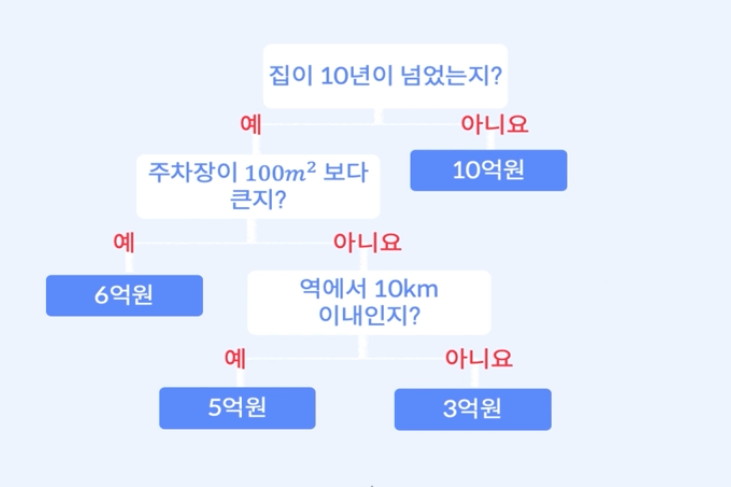

### 의사 결정 나무의 요소  
1. 뿌리 마디
  - 나무구조가 시작되는 마디
  - 전체 데이터로 이루어져 있음
2. 중간 마디
  - 나무 구조의 중간에 있는 마디들
3. 끝 마디
  - 나무 구조의 끝에 위치하는 마디들
  - 끝 마디에서는 더이상의 노드가 생성되지 않음
4. 깊이
  - 뿌리마드 노드에서 끝 마디까지의 노드 개수

## 2. 의사 결정 나무 알고리즘
### CART (Classification And Regression Tree) 알고리즘
목적: 각 분할에서 정보 이득을 최대화하는 것   
*정보 이득의 최대화 -> 불순도의 감소*

**분할**  
노드에서 데이터가 어떤 기준에 의해 나눠지는 과정
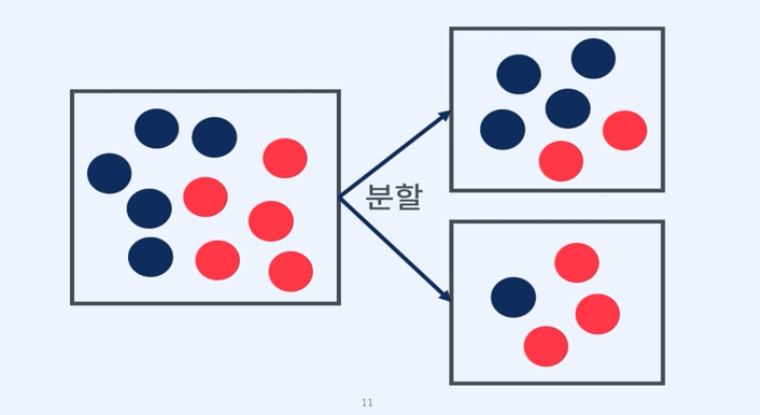

#### 정보 이득 (=불순도)
1. 정답이 범주형 변수인 경우
  - 엔트로피 지수 이용
    - 정보 이론에서 정보의 불확실함의 정도를 나타내는 양
    - 데이터를 잘 구분할 수 없을 수록 엔트로피는 커짐
    - 정보 이득의 최대화 = 불순도의 감소 = 엔트로피의 감소
    - 엔트로피 지수(Entropy Index) 수식
> $ entropy(A) = - ∑_{k=1}^m p_{k}log_{2}(p_{k}), p_{k}$: $k$ 에 속할 확률  
> $ entropy(A) = - ∑_{i=1}^d R_{i}(- ∑_{k=1}^m p_{k}log_{2}(p_{k})), R_{i}$: 분할 후 비율  

    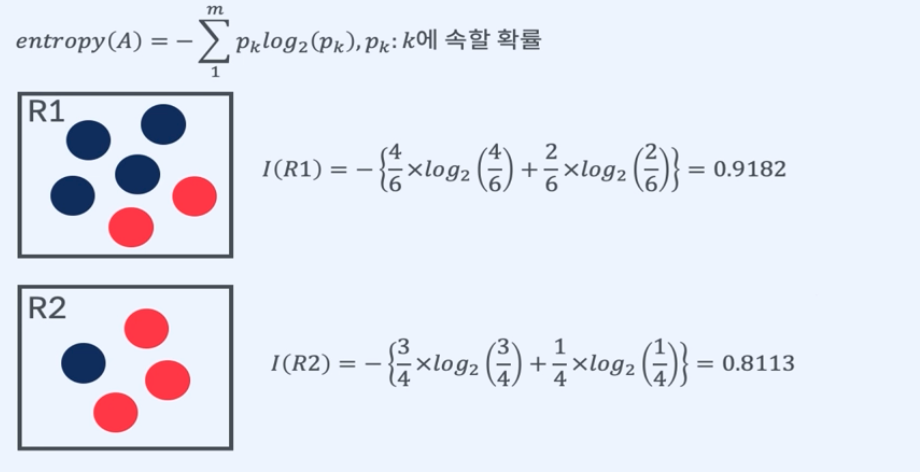    
    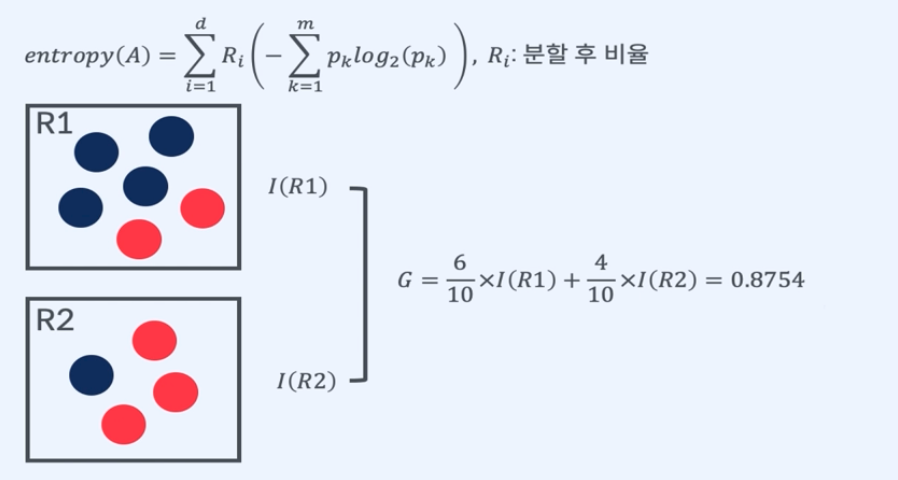
  - 지니 지수 이용
    - 불평등의 정도를 나타내는 통계학적 지수  
    - 데이터가 비슷하게 있을 수록 지니 지수는 높아짐  
    - 정보 이득의 최대화 -> 불순도의 감소 -> 지니지수 감소
    - 지니 지수 수식
> $I(A) = 1 - ∑_{k=1}^m(p_{k})^2, p_{k}: k$에 속할 확률  
> $I(A) = ∑_{i=1}^d R_{i}(1 - ∑_{k=1}^m(p_{k})^2), R_{i}: $분할 후 비율   
      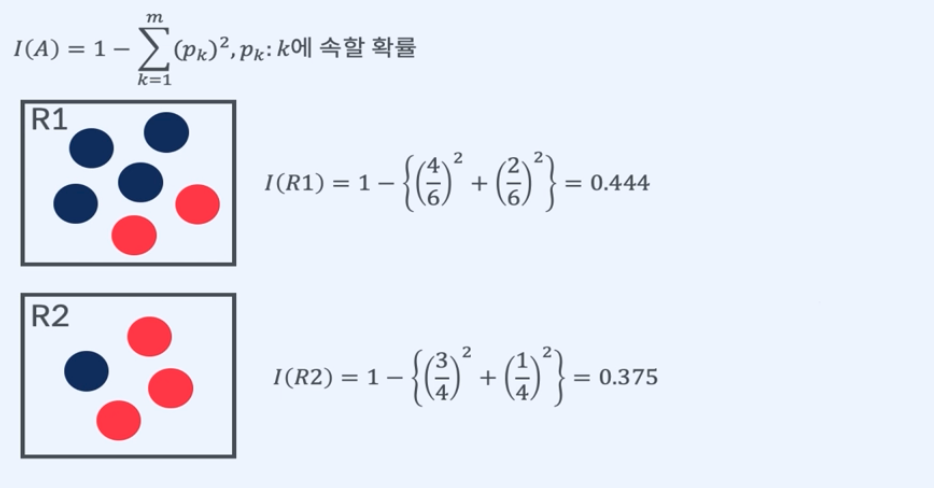  
      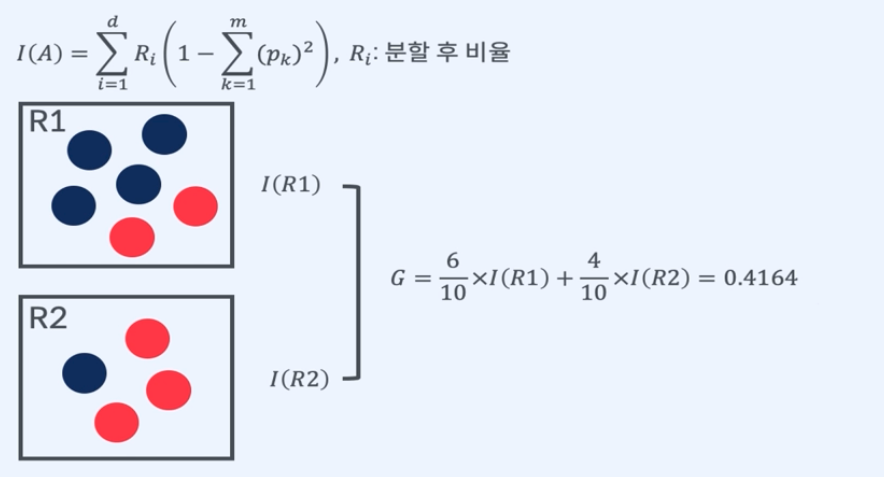

2. 정답이 연속형 변수인 경우
  - MSE를 이용한 분산량 감소 이용
  - 노드에 있는 데이터의 평균으로 예측을 진행  
  - 아래 그림처럼 데이터의 분산을 줄이는 방향으로 분할을 진행함  
    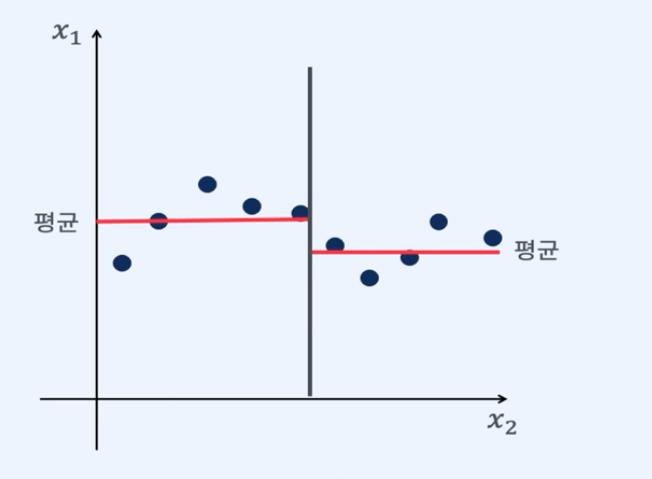

**노드를 나누는 방법**
1. 범주형 변수를 나누는 방법  
  - 데이터의 특성의 유무로 분할함  
    - e.g. 사각형인가? 삼각형인가? 등
  - 정보 이득을 최대화하는 분할을 선택
2. 연속형 변수를 나누는 방법  
  - 변수의 특성 유무로 나눌 수 없음  
  - 경계값을 찾고 경계값과의 비교를 통해 데이터를 분할함  
  - 연속형 변수의 경계값을 찾는 방법
    1. 변수 값에 따라 데이터를 정렬  
    2. 정답이 바뀌는 경계 지점을 찾음  
    3. 경계의 평균값을 기준으로 잡음  
    4. 구간별 경계값을 기준으로 불순도를 계산
    5. 가장 불순도를 낮추는 구간을 경계로 나눔

**연속형 변수 나누기 예시**

|값|정답|  
|--|--|
|30|0|
|120|0|
|150|1|
|390|0|
|400|0|
|300|1|
|500|0|  

step1) 변수 값에 따라 데이터 정렬  

|값|정답|  
|--|--|
|30|0|
|120|0|
|150|1|
|300|1|
|390|0|
|400|0|
|500|0|  

step2) 정답이 바뀌는 경계 지점 찾기  

|값|정답||  
|--|--|--|
|30|0||
|120|0|경계|
|150|1|지점|
|300|1|경계|
|390|0|지점|
|400|0||
|500|0||  

step3) 경계의 평균값을 기준으로 잡음

|값|정답|  
|--|--|
|30|0|
|120|0|
|150|1|
|300|1|
|390|0|
|400|0|
|500|0| 

- 120 ~ 150 구간 경계 평균: 135   
- 300 ~ 390 구간 경계 평균: 345

step4) 구간별 경계값을 기준으로 불순도를 계산  
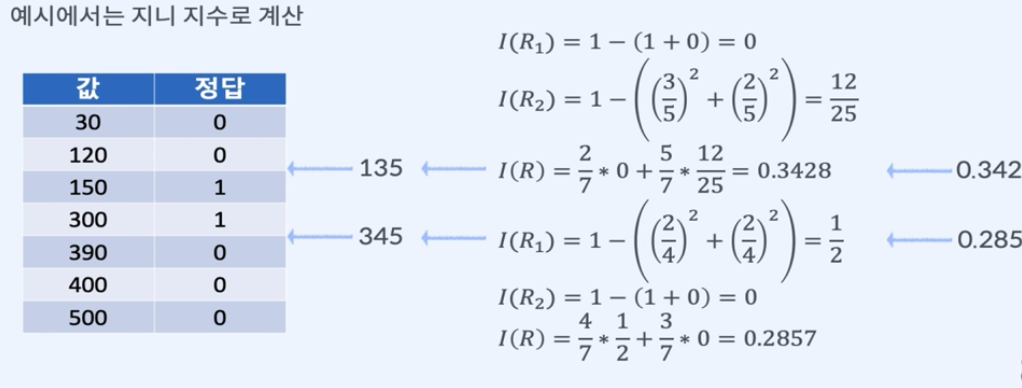

step5) 가장 불순도를 낮추는 구간을 경계로 나눔  
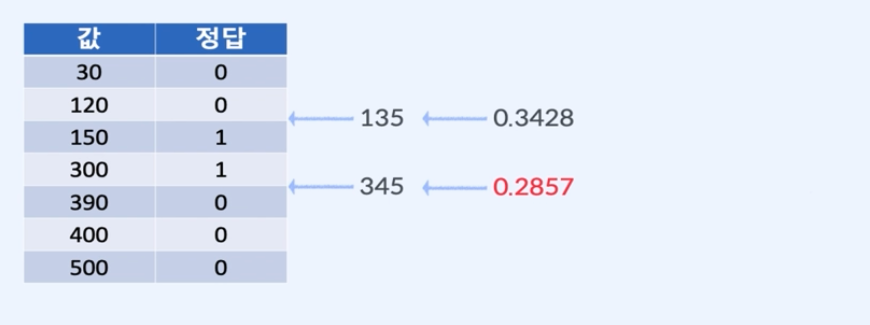

## 3. 변수 중요도 (Feature Importance). 
- 의사결정나무에서 어떤 변수가 가장 중요한지를 나타내는 정도 
- 불순도를 가장 크게 감소시키는 변수의 중요도가 가장 크다고 계산
  - 불순도의 감소는 정보 이득의 최대화와 동일  

### 지니 지수를 이용한 Feature Importance 수식
> $I(C) = wG(C) - w_{left}G(C_{left}) - W_{right}G(C_{right})$
- 부모노드의 지니지수에서 자식 노드의 지니지수를 뺌  
- 가중치는 전체 데이터 대비 노드에 있는 데이터 수의 비율

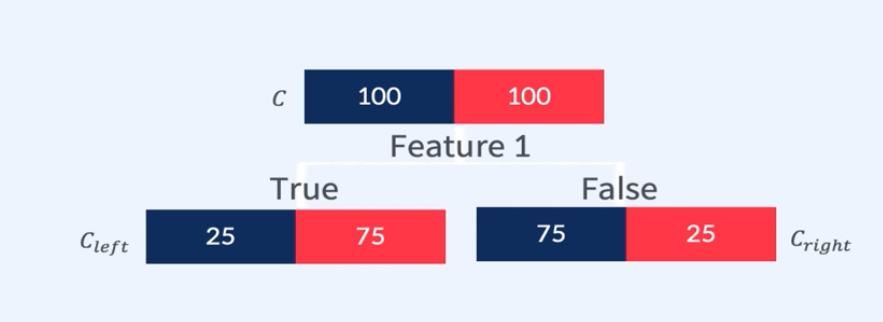

위와 같이 분할되었을 때

각 노드의 지니 지수를 계산하면 아래와 같음   
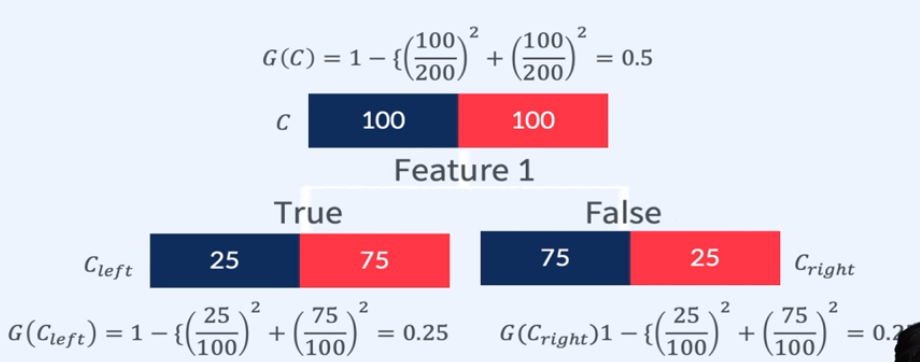


Feature Importance를 계산  
> $I(C) = wG(C) - w_{left}G(C_{left}) - W_{right}G(C_{right})$  
= 0.5 - $100 \over 200$ * 0.25 = $100 \over 200$ * 0.25  
= 0.25 


## 4. 가지치기
### Full Tree
- 모든 끝 마디에서의 순도가 100%인 상태  
- 분기가 너무 많아서 과대 적합(Overfitting)이 발생할 수 있음  

### 가지치기
- 분기가 너무 많아지는 것을 막기 위해서 적절한 수준에서 끝 노드를 결합해주는 것
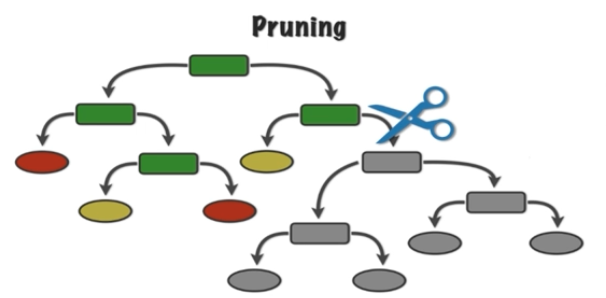

1. 사전 가지치기 (Pre-Pruning)
  - 의사 결정 나무의 최대 Depth나 노드의 최소 개수를 미리 지정해 더 이상의 분할이 일어나지 않게 하는 방법  
2. 사후 가지치기 (Post-Pruning)
  - 의사 결정 나무를 만든 후 데이터가 적은 노드를 삭제 or 병합

## 의사 결정 나무 정리  
### 의사 결정 나무의 장점  
1. 모델의 예측 결과를 해석하고 이해하기 쉬움
2. 데이터를 가공할 필요가 거의 없음  

### 의사 결정 나무의 단점  
1. 연속형 변수를 범주형 값으로 취급하기 떄문에 분리의 경계점 부근에서 예측 오류가 클 수 있음  
2. 노이즈 데이터에 영향을 크게 받음  
3. Overfitting 문제가 발생하기 쉬움  